In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import roc_auc_score

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

In [4]:
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [5]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [6]:
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [7]:
nan_cols = df_insurance_claims.columns[df_insurance_claims.isna().any()].tolist()
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [9]:
# Pre-processing needed

# Drop duplicates
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,NaN,NaN,Employee,2/17/21,3/15/19,WindscreenDamage,Windscreen,...,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
11526,16379,581104,788178.0,NaN,NaN,Employee,3/7/21,7/20/17,WindscreenDamage,Windscreen,...,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
11527,16380,817231,NaN,NaN,NaN,Employee,3/15/21,9/30/20,WindscreenDamage,Windscreen,...,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
11528,16381,321534,468522.0,NaN,NaN,CivilServant,3/6/21,12/28/18,WindscreenDamage,Windscreen,...,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


In [10]:
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [11]:
# checking if there are any claims where the vehicle numbers of the first and thrid parties are the same.
# There are none
df_insurance_claims.loc[df_insurance_claims["FirstPartyVehicleNumber"]==df_insurance_claims['ThirdPartyVehicleNumber']]

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud


In [12]:
# drop rows where the columns have very few na values
# FirstPartyVehicleNumber, PolicyholderOccupation, ClaimCause, ClaimInvolvedCovers, FirstPartyVehicleType, LossPostCode,
# FpVehicleAgeMonths, LossHour, PolicyHolderAge
df_insurance_claims.dropna(subset=['FirstPartyVehicleNumber', 'PolicyholderOccupation', 'ClaimCause', 'ClaimInvolvedCovers', 
                                    'FirstPartyVehicleType', 'LossPostCode', 'FpVehicleAgeMonths', 'LossHour', 'PolicyHolderAge'],
                           inplace=True)

In [13]:
# Are the policy numbers unique, or are there any people who filed claims multiple times
def get_uniqueness(df, column_names):
    for column_name in column_names:
        print("{}: Column length: {}, unique values: {}".format(column_name, len(df[column_name]), df[column_name].nunique()))

get_uniqueness(df_insurance_claims, ["PolicyholderNumber"])

# Create a new column with count of claims made by the same policy holder.
# Multiple claims by the same policy holder may likely indicate a fraud.
counts_policy_holder = df_insurance_claims['PolicyholderNumber'].value_counts()
df_insurance_claims["PolicyHolderCount"] = df_insurance_claims["PolicyholderNumber"].map(counts_policy_holder)
df_insurance_claims[["PolicyholderNumber", "PolicyHolderCount"]]

PolicyholderNumber: Column length: 9120, unique values: 7659


,PolicyholderNumber,PolicyHolderCount
0,531112,1
1,87170,2
2,98706,2
3,38240,1
4,11339,4
...,...,...
11485,267178,1
11486,808381,1
11487,772615,1
11510,555135,1


In [14]:
# Column ClaimInvolvedCovers contains a space sepaated list of strings indicating the covers that the individual took
# We convert this into onehot encoded columns
one_hot = pd.get_dummies(df_insurance_claims["ClaimInvolvedCovers"].str.split(" ", expand=True).stack()).groupby(level=0).sum()
df_insurance_claims = pd.concat([df_insurance_claims, one_hot], axis=1)

In [15]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = ["ReferenceId",                     # unique 
                                    "PolicyholderNumber",              # unique
                                    "FirstPartyVehicleNumber",         # unique    
                                    "ThirdPartyVehicleNumber",         # unique
                                    "InsurerNotes",                    # dropping for now
                                    "DamageImportance",                # too many nans
                                    # "ConnectionBetweenParties",        # maybe we can fill
                                    "LossPostCode",                    # not necessary
                                    "PolicyHolderPostCode",            # not necessary
                                    "ClaimInvolvedCovers"              # already converted above
                                    ], inplace=True)

In [24]:
# make a copy of the cleaned data
df_insurance_claims_nn = df_insurance_claims.copy(deep = True)
# print(df_insurance_claims_nn.info())

# add the days column as before
df_insurance_claims_nn["LossDate"] = pd.to_datetime(df_insurance_claims_nn["LossDate"])
df_insurance_claims_nn["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_nn["FirstPolicySubscriptionDate"])
df_insurance_claims_nn["Days"] = df_insurance_claims_nn["LossDate"] - df_insurance_claims_nn["FirstPolicySubscriptionDate"]
df_insurance_claims_nn["Days"] = pd.to_numeric(df_insurance_claims_nn["Days"].dt.days, downcast='integer')
df_insurance_claims_nn = df_insurance_claims_nn.astype({"Days": "int64"})

# drop columns that are not required
df_insurance_claims_nn.drop(columns=["LossDate", "FirstPolicySubscriptionDate"], inplace=True)

# get the different column types
categorical_columns = []
binary_columns = ["Fraud", "PolicyWasSubscribedOnInternet", "ClaimWithoutIdentifiedThirdParty"]
numerical_columns = []
for col in df_insurance_claims_nn.columns:
    if df_insurance_claims_nn[col].dtype not in ['int64', "float64", "uint8"]:
        categorical_columns.append(col)
    else:
        # not binary data and not previously one-hot encoded
        if col not in binary_columns and df_insurance_claims_nn[col].dtype != "uint8":
            numerical_columns.append(col)

print(categorical_columns)
df_insurance_claims_nn.drop(columns=["ConnectionBetweenParties", "FirstPartyVehicleType"], inplace=True)
# one hot encode the categorical columns
df_insurance_claims_nn = pd.get_dummies(df_insurance_claims_nn, drop_first=True, columns=["ClaimCause", "PolicyholderOccupation"])

['PolicyholderOccupation', 'ClaimCause', 'FirstPartyVehicleType', 'ConnectionBetweenParties']


### Autoencoder

Create the dataset for the autoencoder.
- Training data contains only non fraud samples
- Validation and test data contain equal number of fraud and non fraud data samples. These are picked randomly from the original data.

In [151]:
# separate the fraud and non-fraud samples
df_fraud_data = df_insurance_claims_nn[df_insurance_claims_nn["Fraud"] == 1]
df_non_fraud_data = df_insurance_claims_nn[df_insurance_claims_nn["Fraud"] == 0]

# separate the Fraud column from the rest of the features
x_fraud_data = df_fraud_data.drop(columns=["Fraud"])
y_fraud_data = df_fraud_data["Fraud"]

x_non_fraud_data = df_non_fraud_data.drop(columns=["Fraud"])
y_non_fraud_data = df_non_fraud_data["Fraud"]

print("Amount of fraud data: ", len(df_fraud_data))
print("Amount of non-fraud data: ", len(df_non_fraud_data))

# Split - Non fraud
x_train, x_other, y_train, y_other = train_test_split(x_non_fraud_data, y_non_fraud_data, train_size=0.8, random_state=242)
x_test, x_valid, y_test, y_valid = train_test_split(x_other, y_other, train_size = 0.5, random_state=135)

# apply standard scaler to the data
scaler = MinMaxScaler()
scaler.fit(x_train[numerical_columns])
x_train[numerical_columns] = scaler.transform(x_train[numerical_columns])
x_valid[numerical_columns] = scaler.transform(x_valid[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

x_fraud_data_scaled = x_fraud_data.copy(deep=True)
x_fraud_data_scaled[numerical_columns] = scaler.transform(x_fraud_data_scaled[numerical_columns])

Amount of fraud data:  101
Amount of non-fraud data:  9019


In [82]:
print("train: {}".format(x_train.shape))
print("valid: {}".format(x_valid.shape))
print("test: {}".format(x_test.shape))

train: (7215, 51)
valid: (902, 51)
test: (902, 51)


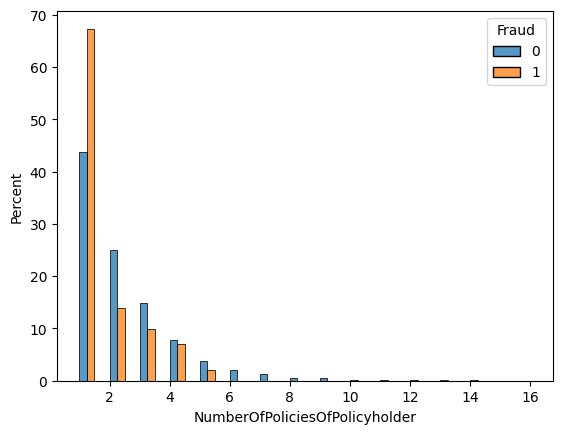

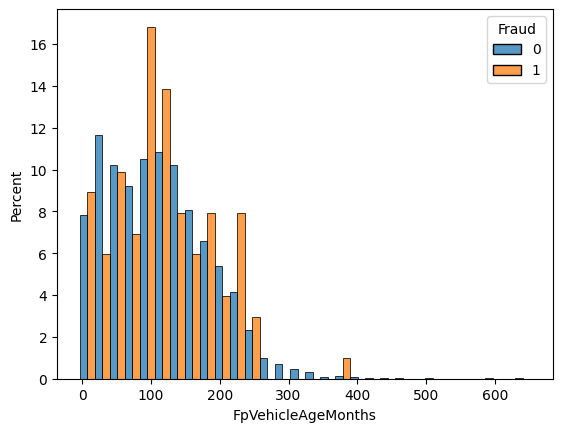

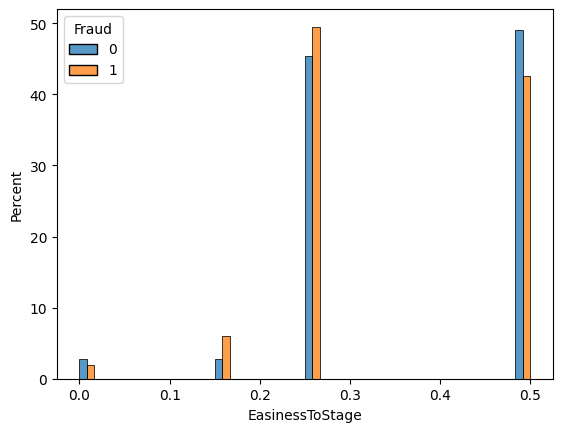

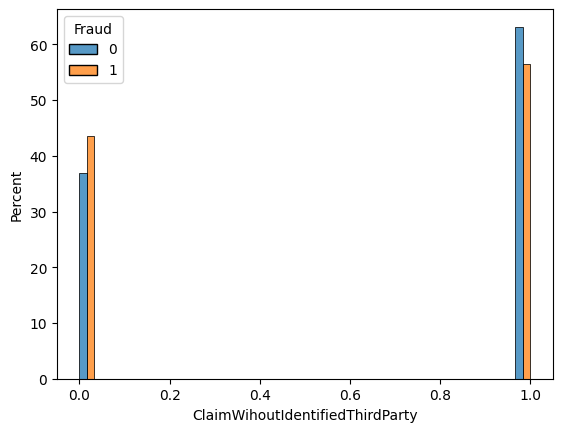

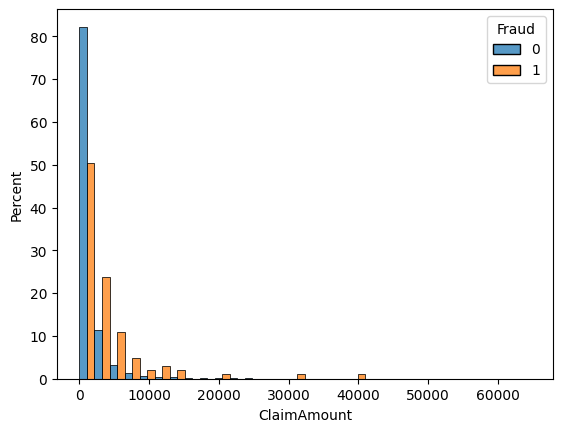

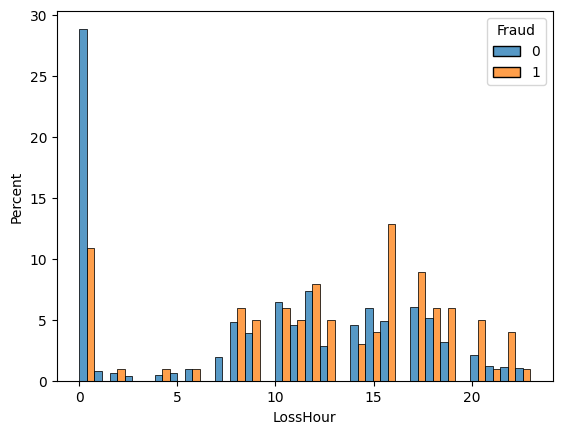

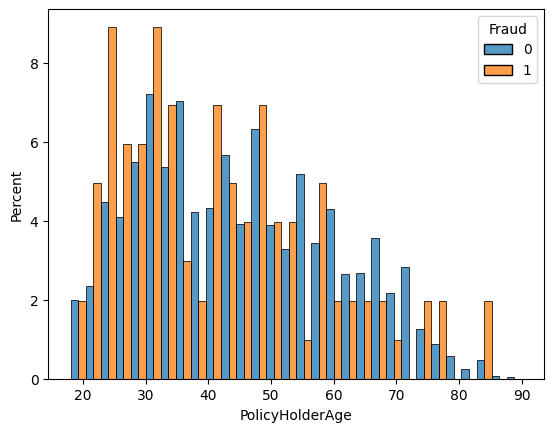

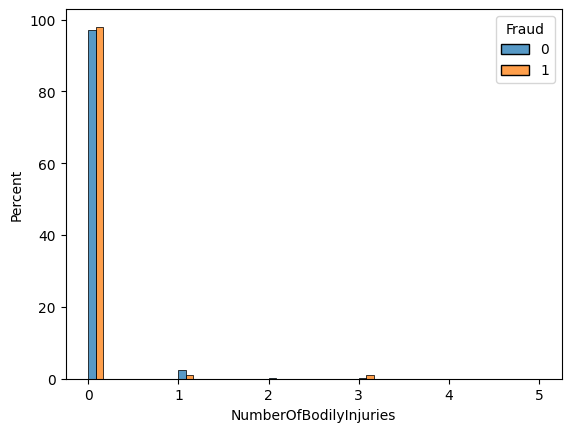

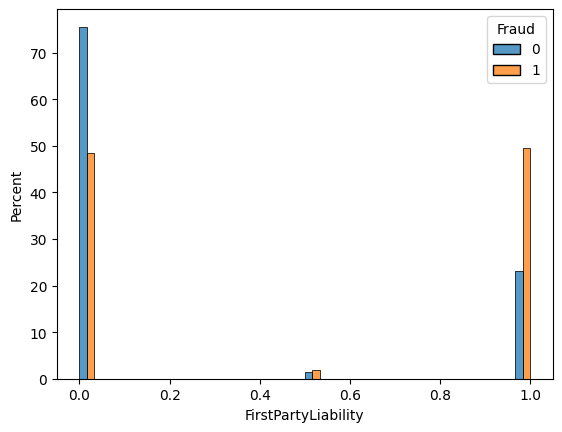

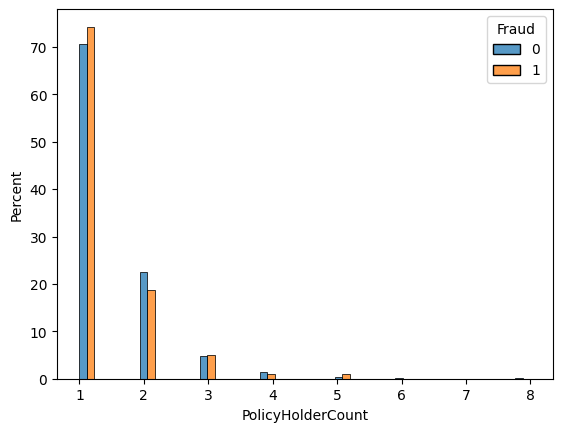

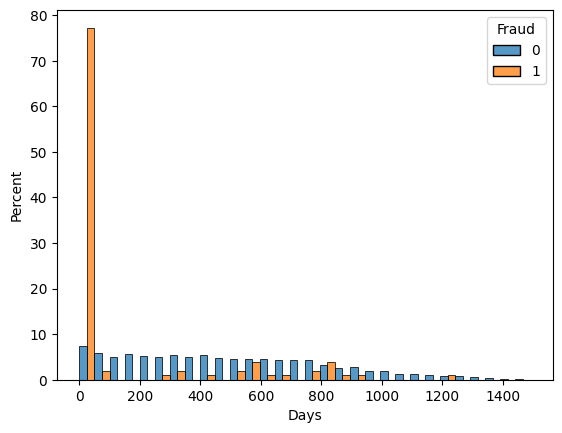

In [66]:
import seaborn as sns
for col in numerical_columns:
    sns.histplot(data=df_insurance_claims_nn, x=col, hue='Fraud', multiple='dodge', common_norm=False, stat='percent', bins=30)
    plt.show()

1. Build the network architecture - basic model

In [90]:
# Encoder - 16 neurons in first layer, 8 neurons in second layer
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1], )),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(8, activation="relu")
    ], 
    name='encoder')

# Decoder - 8 neurons in first layer, 16 neurons in second layer, 57 neurons in output layer
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(x_train.shape[1], activation="sigmoid")], 
    name='decoder')

autoencoder = tf.keras.Sequential([encoder, decoder])

In [91]:
autoencoder.build(x_train.shape)

In [92]:
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=[tf.keras.metrics.mean_squared_error])

history = autoencoder.fit(x=x_train, y=x_train,
                epochs=300, batch_size=128,
                validation_data=(x_valid, x_valid)
                )

Epoch 1/300
57/57 [==============================] - 1s 7ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.0687 - val_mean_squared_error: 0.0687
Epoch 2/300
57/57 [==============================] - 0s 3ms/step - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 3/300
57/57 [==============================] - 0s 3ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 4/300
57/57 [==============================] - 0s 3ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 5/300
57/57 [==============================] - 0s 3ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 6/300
57/57 [==============================] - 0s 3ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 7/300
57/57 [===============

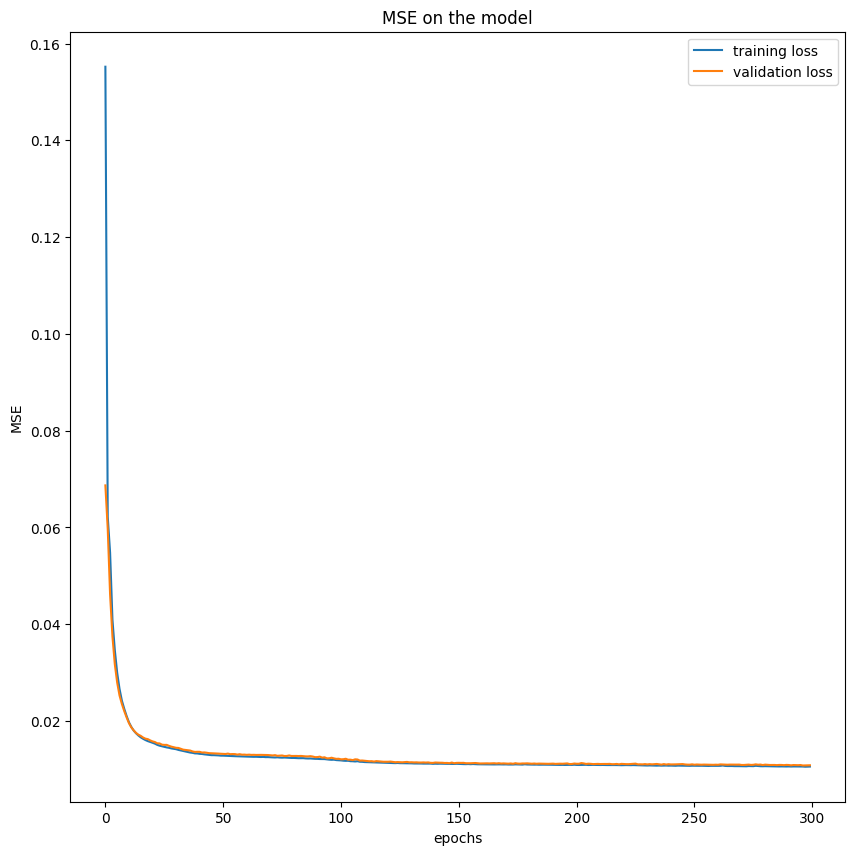

In [95]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss", "validation loss"])
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE on the model")
plt.show()

In [222]:
# function to predict and compute mse
def predict_and_compute_mse(data, model):
    data_hat = model.predict(data)
    mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)(
        data, data_hat).numpy()
    return mse, data_hat

# compute mse on validation data
mse_valid_fraud, x_hat_valid_fraud = predict_and_compute_mse(x_fraud_data_scaled, autoencoder)
mse_valid_non_fraud, x_hat_valid_non_fraud = predict_and_compute_mse(x_train, autoencoder)

226/226 [==============================] - 1s 3ms/step


In [223]:
import seaborn as sns

def plot_histograms(mse_fraud, mse_non_fraud, name, bins=30):
    sns.histplot(
        data=pd.concat(
            [
                pd.DataFrame({'mse': mse_fraud}).assign(fraud='Fraud'),
                pd.DataFrame({'mse': mse_non_fraud}).assign(fraud='Non Fraud'),
            ],
            axis=0
        ),
        x='mse',
        hue='fraud',
        multiple='dodge',
        stat='percent',
        common_norm=False,
        bins=bins
    )
    plt.title(name)
    plt.show()

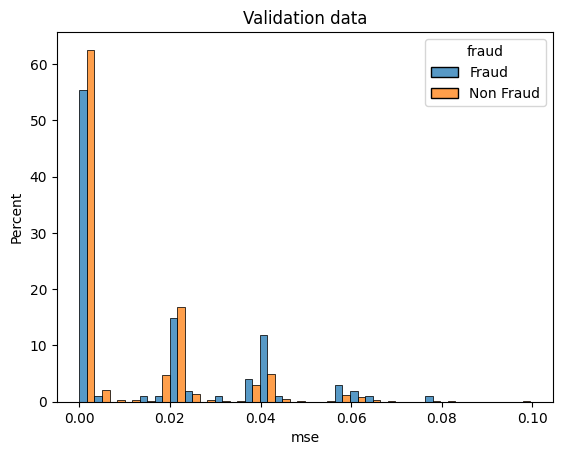

In [224]:
plot_histograms(mse_valid_fraud, mse_valid_non_fraud, "Validation data")

2. Build the network architecture - Hyper parameter tuning

In [221]:
# # define train model for hyperparameter tuning
# def build(hp):
#     num_units_l1 = hp.Int('num_units_l1', min_value = 30, max_value=40)
#     num_units_l2 = hp.Int('num_units_l2', min_value = 20, max_value=30)
#     num_units_l3 = hp.Int('num_units_l3', min_value = 10, max_value=20)

#     dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3)

#     # learning_rate = hp.Float('learning_rate', min_value = 0.0001, max_value=0.1, sampling='log') 
#     learning_rate = 0.001

#     optimizers = hp.Choice('optimizer', values=['rmsprop','adam'])

#     batch_size = 128

#     model = tf.keras.models.Sequential([
#         # encoder
#         tf.keras.layers.Input(shape=(x_train.shape[1], )),
#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="encoder_l1",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation("relu"),

#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="encoder_l2",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="encoder_l3",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

#         # # tf.keras.layers.Dropout(dropout_rate),
#         # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="encoder_l4",
#         #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
#         #                       ),
#         # tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.Activation('relu'),
#         # # tf.keras.layers.Dropout(dropout_rate),
#         # tf.keras.layers.Dense(num_units_l5, kernel_initializer="he_normal", name="encoder_l5",
#         #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
#         #                       ),
#         # tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.Activation('relu'),

#         # decoder

#         # # tf.keras.layers.Dropout(dropout_rate),
#         # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="decoder_l0",
#         #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
#         #                       ),
#         # tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.Activation('relu'),

#         # # tf.keras.layers.Dropout(dropout_rate),
#         # tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="decoder_l1",
#         #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
#         #                       ),
#         # tf.keras.layers.BatchNormalization(),
#         # tf.keras.layers.Activation('relu'),

#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="decoder_l2",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="decoder_l3",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('relu'),

#         tf.keras.layers.Dropout(dropout_rate),
#         tf.keras.layers.Dense(x_train.shape[1], kernel_initializer="glorot_uniform", name="output_layer",
#                               kernel_regularizer=tf.keras.regularizers.L1(0.01)
#                               ),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Activation('sigmoid')])

#     if optimizers == "adam":
#         optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     elif optimizers == "rmsprop":
#         optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

#     model.compile(optimizer=optimizer,
#                   loss='mean_squared_error',
#                   metrics=tf.keras.metrics.mean_squared_error
#                 #   metrics='auc_from_mse'
#                   )

#     return model

# tuner = kt.Hyperband(build,
#                      'val_mean_squared_error',
#                     #  kt.Objective("loss", direction="min"),    # kt.Objective("loss", direction="min"),
#                      max_epochs=100,
#                      factor=3,
#                      directory='logs',
#                      project_name='autoencoder' + str(datetime.datetime.now().timestamp()))

# tuner.search_space_summary()

# tf.keras.backend.clear_session()
# tuner.search(x_train, y_train, 
#               validation_data=(x_valid, y_valid)
#               )

In [130]:
# best_hps=tuner.get_best_hyperparameters()[0]
# print(best_hps['num_units_l1'])
# print(best_hps['num_units_l2'])
# print(best_hps['num_units_l3'])
# print(best_hps['optimizer'])
# print(best_hps['dropout_rate'])

40
27
17
rmsprop
0.10362277612889817


In [131]:
# train the model with the best parameters found
num_units_l1 = 40 #best_hps['num_units_l1']
num_units_l2 = 27 #best_hps['num_units_l2']
num_units_l3 = 17 #best_hps['num_units_l3']
optimizer_choice = 'rmsprop' #best_hps['optimizer']
dropout_rate = 0.1 #best_hps['dropout_rate']

model = tf.keras.models.Sequential([
    # encoder
    tf.keras.layers.Input(shape=(x_train.shape[1], )),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="encoder_l1",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="encoder_l2",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="encoder_l3",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="decoder_l2",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="decoder_l3",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(x_train.shape[1], kernel_initializer="glorot_uniform", name="output_layer",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid')])

epochs_until_change = 400
steps_per_epoch = x_train.shape[0] / 256
steps = epochs_until_change * steps_per_epoch

learning_rate = 0.001
step = tf.Variable(0, trainable=False)
boundaries = [steps, steps*2.5]
values = [0.001, 0.0005, 0.0001]
learning_rate_fn = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)


if optimizer_choice == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_fn, beta_1=0.9, beta_2=0.99, epsilon=1e-07)
elif optimizer_choice == "rmsprop":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate_fn, rho=0.9, epsilon=1e-07, momentum=0.0)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=tf.keras.metrics.mean_squared_error
            )

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=1000, callbacks=[cb],
                    validation_data=(x_valid, y_valid)
                    )

Epoch 1/1000
113/113 [==============================] - 3s 8ms/step - loss: 8.9146 - mean_squared_error: 0.2698 - val_loss: 5.8856 - val_mean_squared_error: 0.2178
Epoch 2/1000
113/113 [==============================] - 1s 7ms/step - loss: 3.9802 - mean_squared_error: 0.2299 - val_loss: 2.4260 - val_mean_squared_error: 0.1899
Epoch 3/1000
113/113 [==============================] - 1s 5ms/step - loss: 1.6300 - mean_squared_error: 0.1835 - val_loss: 1.0023 - val_mean_squared_error: 0.1687
Epoch 4/1000
113/113 [==============================] - 1s 6ms/step - loss: 0.6638 - mean_squared_error: 0.1606 - val_loss: 0.4142 - val_mean_squared_error: 0.1485
Epoch 5/1000
113/113 [==============================] - 1s 7ms/step - loss: 0.2992 - mean_squared_error: 0.1399 - val_loss: 0.2142 - val_mean_squared_error: 0.1293
Epoch 6/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.1796 - mean_squared_error: 0.1212 - val_loss: 0.1539 - val_mean_squared_error: 0.1120
Epoch 7/1000
113

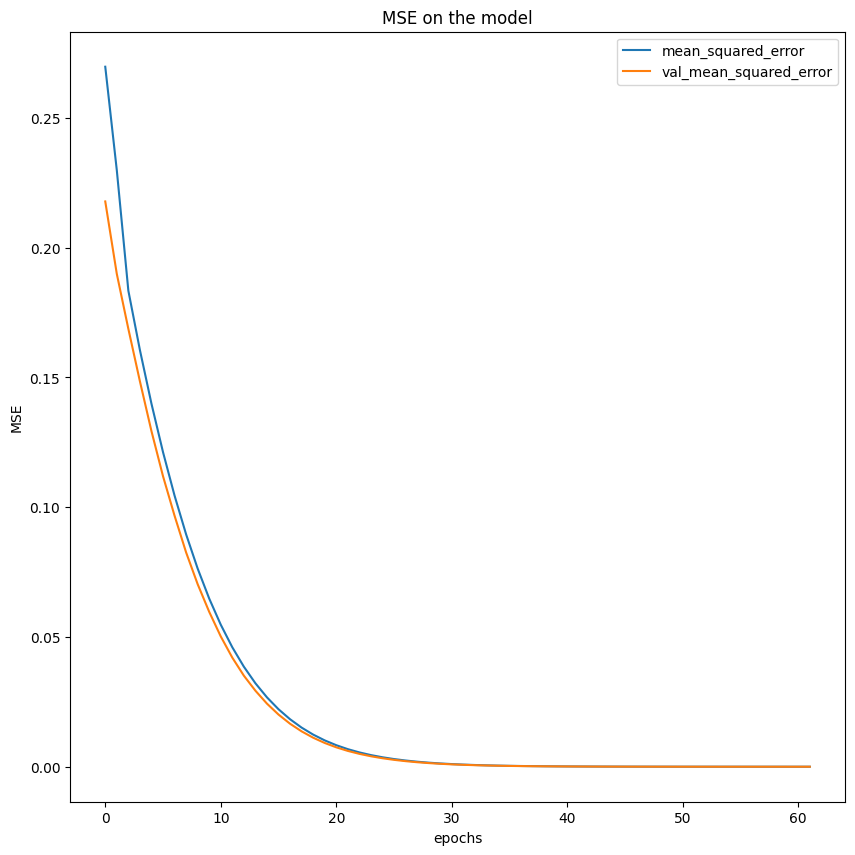

In [132]:
plt.figure(figsize=(10,10))
# plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend([
    # "training loss", 
    "mean_squared_error", 
    # "validation loss", 
    "val_mean_squared_error"])
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE on the model")
plt.show()

In [166]:
mse_train, x_hat_train = predict_and_compute_mse(x_train, model)
mse_valid, x_hat_valid = predict_and_compute_mse(x_valid, model)
mse_fraud, x_hat_fraud = predict_and_compute_mse(x_fraud_data_scaled, model)

4/4 [==============================] - 0s 3ms/step


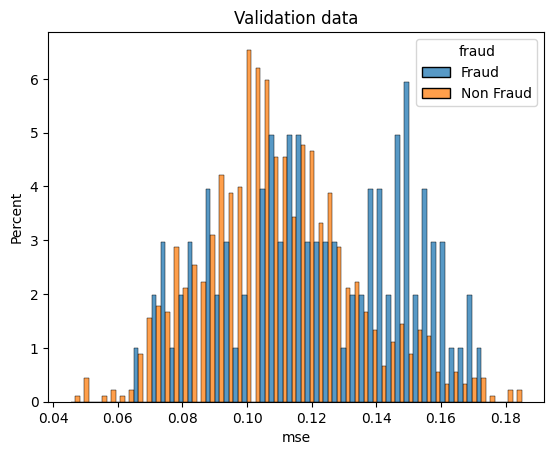

In [167]:
plot_histograms(mse_fraud, mse_valid, "Validation data", bins=50)

In [168]:
model.save("model_4.h5")

### Setting the right threshold

In [183]:
# Merge back
x_eval = pd.concat([x_fraud_data_scaled, x_train, x_valid, x_test]).reset_index(drop=True)
y_eval = pd.concat([y_fraud_data, y_train, y_valid, y_test]).reset_index(drop=True)

In [217]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

mse_eval, x_hat_eval = predict_and_compute_mse(x_eval, model)
precisions = []
recalls = []
f1s = []
thresholds = np.arange(min(mse_eval), max(mse_eval), 0.01).round(2)

for t in thresholds:
    y_pred = mse_eval >= t
    precisions.append(precision_score(y_eval, y_pred))
    recalls.append(recall_score(y_eval, y_pred))
    f1s.append(f1_score(y_eval, y_pred)) 

285/285 [==============================] - 1s 3ms/step


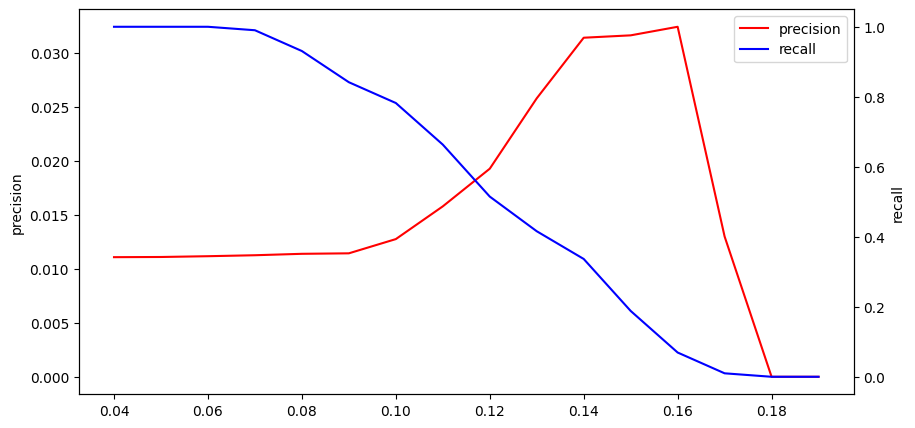

In [218]:
fig, axs = plt.subplots(figsize=(10, 5))
ln1 = axs.plot(thresholds, precisions, label='precision', c='r')
axs.set_ylabel('precision')
ax1 = axs.twinx()
ln2 = ax1.plot(thresholds, recalls, label='recall', c='b')
ax1.set_ylabel('recall')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
axs.legend(lns, labs, loc=1)

Text(0.5, 1.0, 'f1 score')

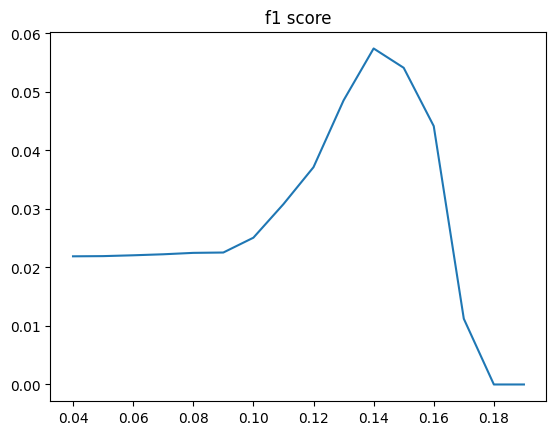

In [219]:
plt.plot(thresholds, f1s)
plt.title('f1 score')

In [231]:
best_threshold_index = np.argmax(f1s)
threshold = thresholds[best_threshold_index]
print('Optimal threshold based on F1:', threshold)

Optimal threshold based on F1: 0.14


In [232]:
# Prediction
y_pred = (mse_eval > threshold).astype(int)

In [235]:
# detection and hit rates
a = 0
b = 0
for i, o in zip(y_eval, y_pred):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

AE_d = round((a / len(y_pred))*100, 2)
AE_h = round((b / a)*100, 2)

print('Detection rate:', AE_d)
print('Hit rate:', AE_h)
print('Precision:', np.round(precisions[best_threshold_index], 2))
print('Recall:', np.round(recalls[best_threshold_index], 2))
print('F1:', np.round(f1s[best_threshold_index], 2))

Detection rate: 11.88
Hit rate: 3.14
Precision: 0.03
Recall: 0.34
F1: 0.06


0.14


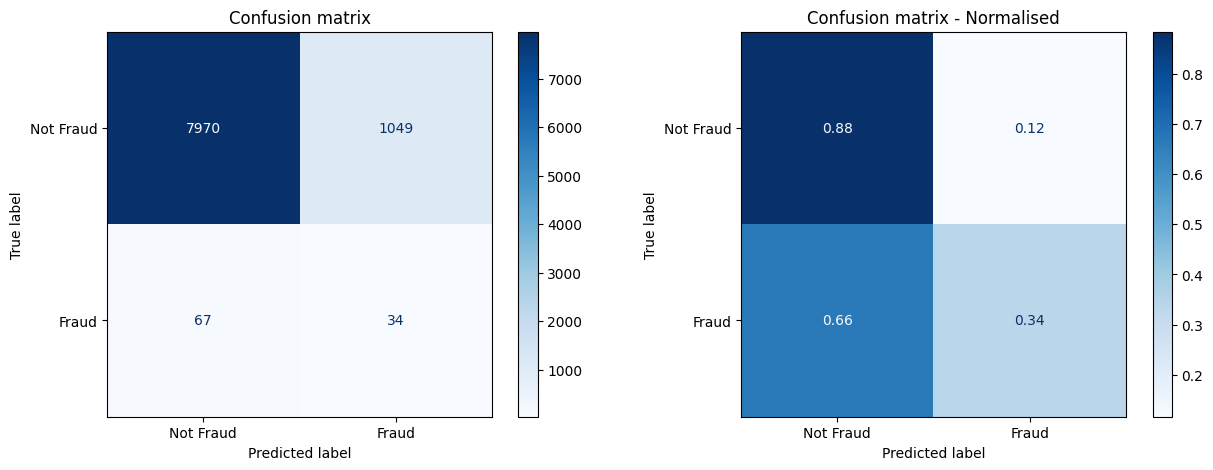

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_eval, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_eval, y_pred, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_eval, y_pred, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()